In [ ]:
!pip install git-python

In [ ]:
# 수업에 사용할 data 다운로드
!git clone http://github.com/nayeho/robot

In [14]:
import tensorflow as tf
print(tf.__version__)

2.18.1


In [13]:
# 폐암 수술 환자의 생존율 예측 코드
from tensorflow.keras.models import Sequential # keras에서 필요한 함수들 호출
from tensorflow.keras.layers import Dense      # 데이터 관련 라이브러리
import numpy as np
import pandas as pd

In [12]:
# 폐암 수술 환자 데이터 load
Data_set = np.loadtxt("robot/data/ThoraricSurgery3.csv", delimiter=",")
df = pd.DataFrame(Data_set)

X = Data_set[ :, : 16]
y = Data_set[ :, 16]

# 딥러닝 모델 설정

model = Sequential() # 딥 러닝 모델 구조 결정
model.add(Dense(30, input_dim=16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 학습
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=50, batch_size=16)



Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8255 - loss: 1.1280   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.4908 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4523 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4386 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4346 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4367 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4466 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4289 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4290 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4274 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4257 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [6]:
# 층을 쌓기 위해
# 회귀, 로지스틱 회귀

# 공부한 시간에 따른 성적 관련 모델 구축

X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 7시간을 공부하면 몇 점 받을 수 있는지?
# 85점 목표시 몇 시간 공부하면 되는지?

mean_X = np.mean(X)
mean_y = np.mean(y)
print(mean_X, mean_y)

# 기울기 구하기
# 분모
divisor = sum((x - mean_X) ** 2 for x in X)
print("분모 : ",divisor)

# 분자
divided = sum((i - mean_X) * (j - mean_y) for (i, j) in zip(X, y))
print("분자 : ",divided)

# 기울기 a
a = divided / divisor
print("기울기 : ",a)

# y 절편 b
b = mean_y - (mean_X * a)
print("y절편 :", b)

5.0 90.5
분모 :  20.0
분자 :  46.0
기울기 :  2.3
y절편 : 79.0


In [7]:
# 오차 = 실제 값 - 예측 값 (y - y_pred)

def predict(X):
    y_pred = a * X + b
    return y_pred

predict_list = []

for x in X:
    y_pred = predict(x)
    predict_list.append(y_pred)
print(predict_list)

# 오차 제곱 합
total = sum((y_real - y_pred) ** 2 for (y_real, y_pred) in zip(y, predict_list))
print(total)

# MSE (Mean square Error)
MSE = total / len(X)
print("오차 제곱 합:", MSE)

# 실제 값과 예측 값이 얼마나 떨어져 있는지 정도
# MSE가 줄면 더 좋은 예측
# 어떻게 오차를 줄여 나가야 할 것인가 ?
# 특정 m지점에서 오차가 최소일려면 해당 지점에서 접선의 기울기가 0
# ->미분에서 0이 되는 지점을 찾자

# MSE 구하는 함수 정의

a = divided / divisor # 2.3
b = mean_y - (mean_X * a) # 79

def predict(X, a, b):
    y_pred = a * X + b
    return y_pred

def MSE(X, y, a, b):
    predict_list = []
    for x in X:
        y_pred = predict(x, a, b)
        predict_list.append(y_pred)
        
    total = sum((y_real - y_pred) ** 2 for (y_real, y_pred) in zip(y, predict_list))
    
    result = total / len(X)
    return result

print("MSE값 : ",MSE(X, y, a, b))

# 만약, a가 3이면 MSE가 어떻게 되는지?
print("MSE값 : ",MSE(X, y, 3, b)) 
print("MSE값 : ",MSE(X, y, 2, b))
print("MSE값 : ",MSE(X, y, 2.2, b))
print("MSE값 : ",MSE(X, y, 2.3, b))


[np.float64(83.6), np.float64(88.2), np.float64(92.8), np.float64(97.4)]
33.19999999999994
오차 제곱 합: 8.299999999999985
MSE값 :  8.299999999999985
MSE값 :  23.0
MSE값 :  11.0
MSE값 :  8.600000000000017
MSE값 :  8.299999999999985


In [8]:
# 편미분해서 오차를 확인하고
# 기울기를 수정해 나가는 방식
# 경사 하강 법
a, b = 0, 0  # 초반 값 모름
lr = 0.03    # 학습률(Learning rate)
epochs = 1000 # 학습을 100번 진행하겠다
# a_diff = - (2 / n) * sum(x_i * (y_i - (a * x_i + b)) for (x_i, y_i) in zip(X,y))
# b_diff = - (2 / n) * sum(y_i - (a * x_i + b) for (x_i, y_i) in zip(X,y))


# 2번째
# a_diff = - (2 / n) * sum(x_i * (y_i - (a * x_i + b)) for (x_i, y_i) in zip(X,y))
# b_diff = - (2 / n) * sum(y_i - (a * x_i + b) for (x_i, y_i) in zip(X,y))

# print(a_diff, b_diff)

# 100번 째 
for i in range(1, epochs + 1):
    n = len(X)
    a_diff = - (2 / n) * sum(x_i * (y_i - (a * x_i + b)) for (x_i, y_i) in zip(X, y))
    b_diff = - (2 / n) * sum(y_i - (a * x_i + b) for (x_i, y_i) in zip(X, y))
    if i % 100 == 0:
        print(f"epochs : {i}, 기울기 : {a}, y절편 : {b}")
        
# 편미분 값이 0을 향하도록 a, b를 수정
    a = a - lr * a_diff
    b = b - lr * b_diff

epochs : 100, 기울기 : 7.168115109996344, y절편 : 49.94918081964135
epochs : 200, 기울기 : 4.1314600407292446, y절편 : 68.0706297373792
epochs : 300, 기울기 : 2.989023762004365, y절편 : 74.88820086312575
epochs : 400, 기울기 : 2.5592214594087714, y절편 : 77.45307719148077
epochs : 500, 기울기 : 2.3975231461140605, y절편 : 78.41802357171171
epochs : 600, 기울기 : 2.336689724877233, y절편 : 78.781051413026
epochs : 700, 기울기 : 2.313803245334121, y절편 : 78.91762813507938
epochs : 800, 기울기 : 2.3051929956518156, y절편 : 78.96901042283822
epochs : 900, 기울기 : 2.3019536857591842, y절편 : 78.9883412389219
epochs : 1000, 기울기 : 2.3007350069789276, y절편 : 78.99561379269015


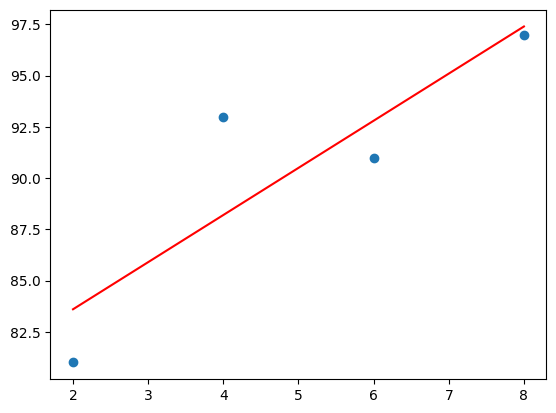

In [9]:
# 그래프를 그려보자
import matplotlib.pyplot as plt
y_model = a * X + b
plt.scatter(X,y)
plt.plot(X, y_model, "r")
plt.show()


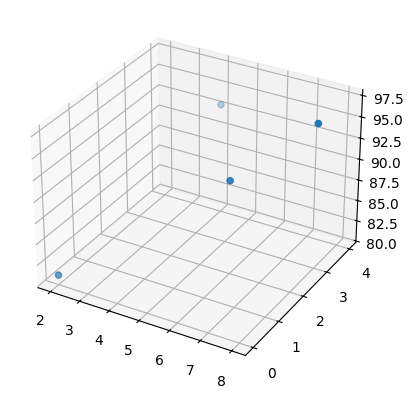

In [16]:
# 다중 선현 회귀
# 에서 경사 하강법으로 a1, a2, b 구해보자
X1 = np.array([2, 4, 6, 8])    # 공부 시간
X2 = np.array([0, 4, 2, 3])    # 과외 횟수
y = np.array([81, 93, 91, 97]) # 성적


# 3차원 그래프로 그려보자
fig = plt.figure() # 그래프 그릴 도화지
graph = fig.add_subplot(111, projection="3d") # 1행 1열 1번째에 3d로 그리겠다
graph.scatter3D(X1, X2, y)
plt.show()

In [17]:
# 학습을 위한 기본 설정
# 경사 하강 법
a1, a2, b = 0, 0, 0 # 초기 값 모름
lr = 0.01 # 일단 학습률은 작게
epochs = 1000

for i in range(1, epochs + 1):
        
    y_pred = a1 * X1 + a2 * X2 + b
    error = y - y_pred
    
    a1_diff =  - (2 / n) * sum(x1_i * (e) for (x1_i, e) in zip(X1, error))
    a2_diff =  - (2 / n) * sum(x2_i * (e) for (x2_i, e) in zip(X2, error))
    b_diff = - (2 / n) * sum(e for e in error)

    if i % 100 == 0:
        print(f"epochs : {i}, a1 : {a1}, a2 : {a2},b : {b}")

    a1 = a1 - lr * a1_diff 
    a2 = a2 - lr * a2_diff 
    b = b - lr * b_diff

epochs : 100, a1 : 9.562510393351513, a2 : 5.043427821089658,b : 22.570237987483065
epochs : 200, a1 : 7.36098794836017, a2 : 4.3076957299705185,b : 37.62016070032791
epochs : 300, a1 : 5.765078715091985, a2 : 3.7582406208294894,b : 48.573422266851246
epochs : 400, a1 : 4.604014505840463, a2 : 3.35745322991716,b : 56.54501038524882
epochs : 500, a1 : 3.7590405432482767, a2 : 3.0657094157584344,b : 62.346580583872765
epochs : 600, a1 : 3.144086363712511, a2 : 2.8533800769114017,b : 66.5688524210894
epochs : 700, a1 : 2.6965345887673284, a2 : 2.698850603243738,b : 69.64174107593264
epochs : 800, a1 : 2.3708149778462193, a2 : 2.586386993446598,b : 71.87813064027023
epochs : 900, a1 : 2.1337624780338507, a2 : 2.5045381291804785,b : 73.50573217249645
epochs : 1000, a1 : 1.9612402046360067, a2 : 2.4449700918579795,b : 74.69026942393315


In [ ]:
y_test = a1 * 100 + a2 * 1 + b
y_test

In [20]:
# 우리가 만든 모델과
# 딥 러닝으로부터 학습한 모델 비교

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

model = Sequential()
model.add(Dense(1, input_dim=1, activation="linear"))

# 학습
model.compile(optimizer="sgd", loss="mse")
model.fit(X, y, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


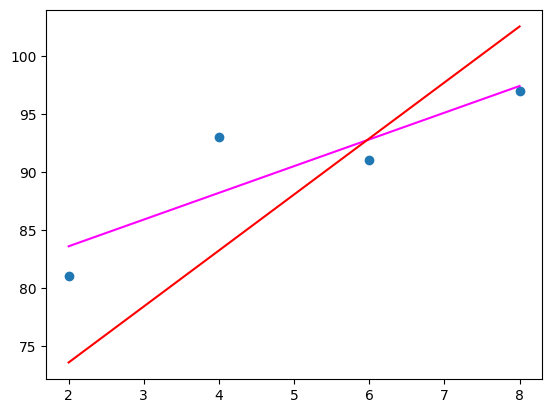

In [19]:
y_custom = 2.3 * X + 79.0
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X,y_custom, c = "magenta")
plt.plot(X, y_pred, "r")
plt.show()

In [22]:
# 로지스틱 회귀를 tensorflow에서 써 보자
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

X = np.array([2, 4, 6, 8, 10, 12 ,14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

model = Sequential() # 딥 러닝 모델
model.add(Dense(1, input_dim=1, activation="sigmoid")) # 이 layer를 통해 출력 값이 하나다
model.compile(optimizer="sgd", loss="binary_crossentropy")
model.fit(X, y, epochs=500, verbose=0)

C:\Users\KCCISTC\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


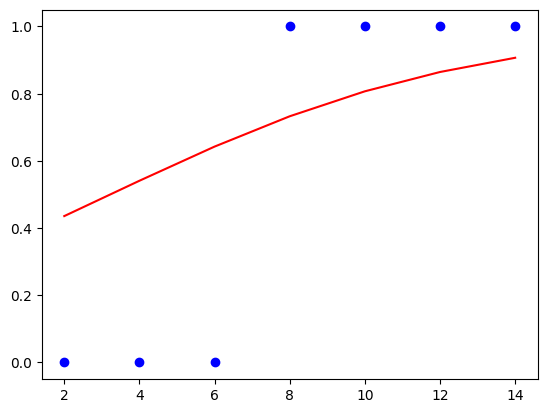

In [25]:
# 모델 그래프 그리기
plt.scatter(X, y, c="blue")
y_pred = model.predict(X)
plt.plot(X, y_pred, "r")
plt.show()

In [35]:
model.predict(np.array([7]))

# tensorflow를 활용하여 예측

import tensorflow as tf
hour = 7
input_data = tf.constant([[hour]], dtype=tf.float32)
pred_prob = model.predict(input_data)[0][0]
print(f"{hour}시간 공부 시 합격 확률 : {pred_prob * 100}%")

# 합/불 여부
print("합격" if pred_prob >= 0.5 else "불합격")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7시간 공부 시 합격 확률 : 68.94235229492188%
합격


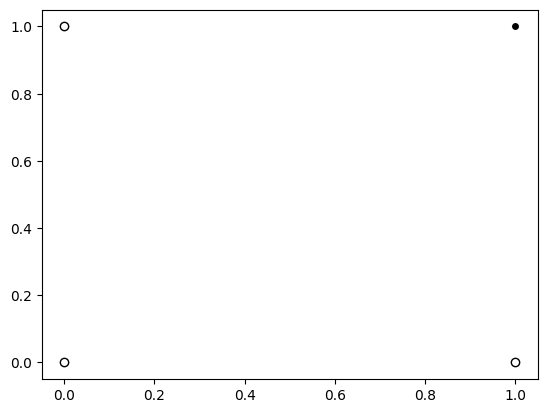

In [38]:
# AND GATE
plt.scatter(0, 0, c="white",edgecolor="black")
plt.scatter(0, 1, c="white",edgecolor="black")
plt.scatter(1, 0, c="white",edgecolor="black")
plt.scatter(1, 1, c="black",edgecolor="white")
plt.show()

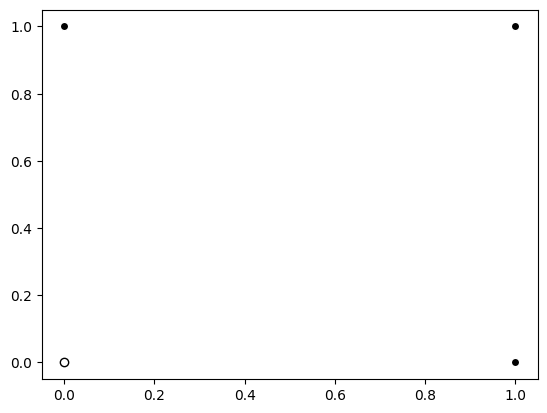

In [39]:
# OR GATE
plt.scatter(0, 0, c="white",edgecolor="black")
plt.scatter(0, 1, c="black",edgecolor="white")
plt.scatter(1, 0, c="black",edgecolor="white")
plt.scatter(1, 1, c="black",edgecolor="white")
plt.show()

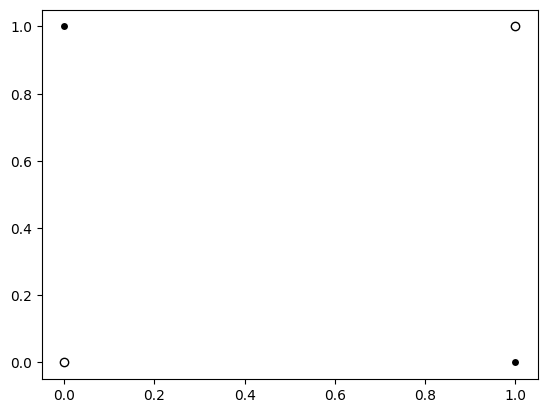

In [40]:
# XOR GATE
plt.scatter(0, 0, c="white",edgecolor="black")
plt.scatter(0, 1, c="black",edgecolor="white")
plt.scatter(1, 0, c="black",edgecolor="white")
plt.scatter(1, 1, c="white",edgecolor="black")
plt.show()

In [46]:
# 다층 퍼셉트론으로 XOR 해결하기
# 가중치, 바이어스
w11 = np.array([-2, -2]) # w1의 컬럼 1
w12 = np.array([2, 2])   # w2의 컬럼 2
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 다층 퍼셉트론(Multiple Layer Perceptron)

def MLP(x, w, b): # 가중치와 바이어스가 들어오면 결과 리턴
    # x = (1, 0)
    # w = (-2,
    #      -2)
    # b = 3
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
        
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# 최종 모델 XOR
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

In [47]:
xor_data = [(0, 0), (0, 1), (1, 0), (1, 1)]
for data in xor_data:
    print(f"{data} : {XOR(data[0],data[1])}")
    

(0, 0) : 0
(0, 1) : 1
(1, 0) : 1
(1, 1) : 0


In [59]:
# 역전파
# AND GATE를 퍼셉트론으로 구현해 보기
# (0, 0) : 0
# (0, 1) : 0
# (1, 0) : 0
# (1, 1) : 1

# y = w1 * x1 + w2 * x2 + b
w1 = 0.2
w2 = 6.3
b = 9
lr = 0.01

X = np.array([(0,0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 0, 0, 1])

# y값이 0이상이다 -> 1
# y값이 0미만이다 -> 0
def step_function(value):
    return 1 if value >= 0 else 0

epochs = 0
while True:    
    error_count = 0 # 오차의 개수
    for x, yi in zip(X, y):
        y_pred = step_function(w1 * x[0] + w2 * x[1] +b)
        y_real = yi
        error = y_real - y_pred
     
    
        # 예측 -> 오차가 발생하면 바로 바로 수정
        w1 = w1 + lr * error * x[0]
        w2 = w2 + lr * error * x[1]
        b = b + lr * error
        
        # 오차의 개수를 세자
        error_count += abs(error)
        
    epochs += 1
    # for문 1바퀴 돈 후 error_count를 확인
    if error_count == 0:
        print(f"w1 : {w1}, w2 : {w2}, b : {b}, 학습횟수 : {epochs}")
        break
        

w1 : 0.02000000000000031, w2 : 1.470000000000091, b : -1.4899999999998534, 학습횟수 : 696


In [69]:
# 역전파
# OR GATE를 퍼셉트론으로 구현해 보기
# (0, 0) : 0
# (0, 1) : 1
# (1, 0) : 1
# (1, 1) : 1

# y = w1 * x1 + w2 * x2 + b
w1 = 0
w2 = 0
b = 0
lr = 0.01

X = np.array([(0,0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 1, 1, 1])

# y값이 0이상이다 -> 1
# y값이 0미만이다 -> 0
def step_function(value):
    return 1 if value >= 0 else 0

epochs = 0
while True:
    if epochs % 100 == 0:
        print(f"학습횟수 : {epochs}")
    error_count = 0 # 오차의 개수
    
    for x, yi in zip(X, y):
        y_pred = step_function(w1 * x[0] + w2 * x[1] +b)
        y_real = yi
        error = y_real - y_pred
     
    
        # 예측 -> 오차가 발생하면 바로 바로 수정
        w1 = w1 + lr * error * x[0]
        w2 = w2 + lr * error * x[1]
        b = b + lr * error
        
        # 오차의 개수를 세자
        error_count += abs(error)
        
    epochs += 1
    # for문 1바퀴 돈 후 error_count를 확인
    if error_count == 0:
        print(f"w1 : {w1}, w2 : {w2}, b : {b}, 학습횟수 : {epochs}")
        break


학습횟수 : 0
w1 : 0.01, w2 : 0.01, b : -0.01, 학습횟수 : 4


In [ ]:
# 1 부터 100까지의 합을 total에 누적시켜서 출력
total = 0
for i in range(1, 101):
    total += i
print(total)

total2 = sum(i for i in range(1, 101))
print(total2)

In [ ]:
# 여러 은닉층을 쌓으면서
# 역전파를 통해 가중치 업데이트를 거꾸로 진행하고 있어따
# 은닉층이 많으니 처음 쌓은 층(Layer)의 가중치는 수정할 확률이 줄어듦
# -> 기울기 소실
# 해결하고자 Relu 활성화 함수를 도입
# 이전 시그모이드 함수에서는 여러 층을 진행하면
# 0 ~ 1로 출력 결과가 정해짐
# Relu는 양의 범위에서 원 데이터 (y=x) 정보를 갖고 있기 때문에
# 상대적으로 가중치를 수정하기 위해 거슬러 올라오는 범위가
# 입력층까지 올 수 있게 되었다

In [75]:
# 환경설정 이후에 돌렸었던 코드 다시 한 번 보자
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

dataset = np.loadtxt("robot/data/ThoraricSurgery3.csv", delimiter=",")
X = dataset[ :, 0 : 16]
y = dataset[ :, 16]

model = Sequential()
model.add(Dense(30, input_dim=16, activation="relu")) # 층마다 출력 결과 30개, feature 16개, 활성화 함수 relu
model.add(Dense(1, activation="sigmoid")) # 출력결과를 sigmoid 사용해서 0, 1 범위로 변환
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 모델에 대한 오차 -> MSE 제곱 평균 오차 대신에 로지스틱 회귀처럼 분류타임이므로 크로스 엔트로피 쓰자
# 오차를 수정해 나가는 방식을 경사하강법 최종 보스인 adam을 쓰자
# 평가 지표는 정확도
model.fit(X, y, epochs=50, verbose=1)
# 최종 결과
# 학습한 모델을 가지고 다른 곳에서도 적용 가능
# 이 중 우리가 선정한 평가지표(정확도) 기준
# 정확도가 가장 높은 모델, 가장 마지막 모델

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8511 - loss: 2.4068  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 1.9199 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 1.4336 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.9665 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.5707 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.4284 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.4134 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4154 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8489 - loss: 0.4131 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4120 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4102 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [77]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


In [83]:
# 정상 - 당뇨 판별 모델
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# pandas를 가져오는 이유 : 데이터 처리, jupyter notebook 상 시각화 용이
df = pd.read_csv("robot/data/pima-indians-diabetes3.csv")
df.head() # diabets 딩뇨 : 1, 정상 : 0
df["diabetes"].value_counts()

df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


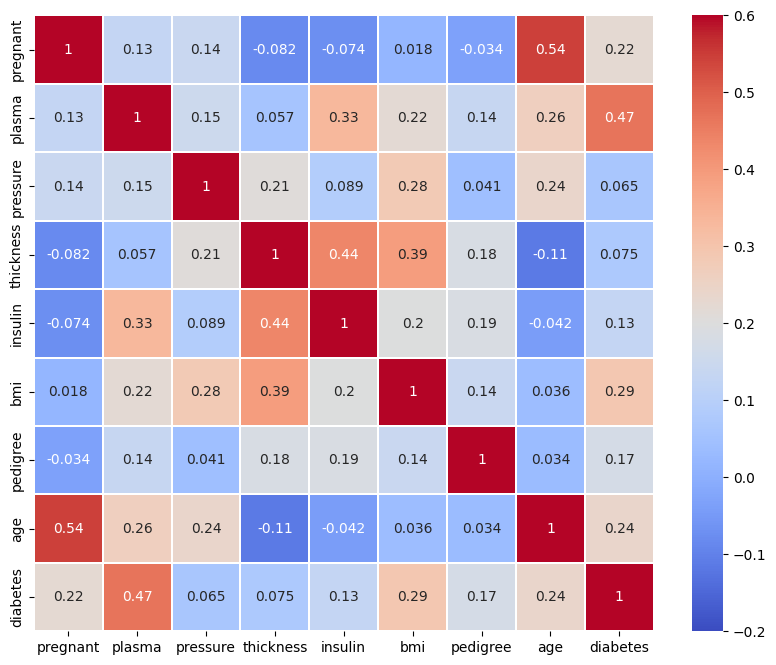

In [89]:
# 상관관계 계수 (corr)를 seaborn 활용해서 heatmap 찍어보자

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), vmax=0.6, vmin=-0.2, cmap="coolwarm", linewidths=0.1, annot=True)
plt.show()

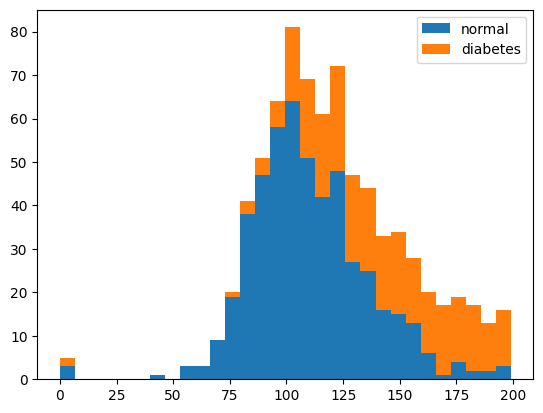

In [93]:
# 전처리
# 어떤 feature를 사용할건지
# plasma, bmi를 조금 더 명확하게 확인

# plasma 기준 정상과 당뇨가 얼마나 있는지 히스토그램

plt.hist(x = [df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.legend()
plt.show()

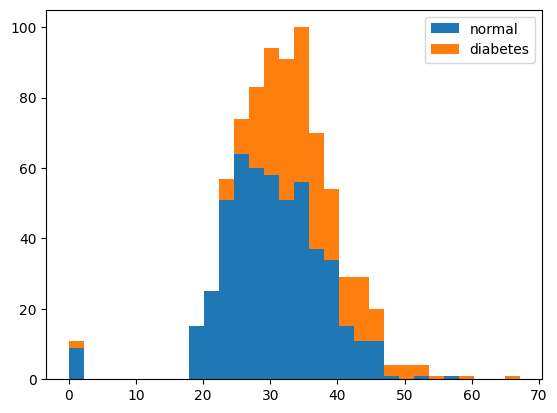

In [94]:
plt.hist(x = [df.bmi[df.diabetes == 0], df.bmi[df.diabetes == 1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.legend()
plt.show()

In [99]:
# 경향성을 보이는 데이터 : plasma, bmi
# 8개의 feature를 가지고 학습
# 2개만 가지고 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1) 8개의 feature
X = df.iloc[ :, : 8]
y = df.iloc[ :, 8]

model = Sequential()
model.add(Dense(16, input_dim=8, activation="relu", name="Dense1"))
model.add(Dense(8, activation="relu", name="Dense2"))
model.add(Dense(1, activation="sigmoid", name="Dense3"))
# 오차, 오차수정
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=50)

Epoch 1/50


C:\Users\KCCISTC\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5599 - loss: 1.1763   
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.9164 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.8158 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.7442 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - loss: 0.7018 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 0.6694 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - loss: 0.6540 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6784 - loss: 0.6399 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.6098 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6966 - loss: 0.6028 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.5984 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - 

In [103]:
# 경향성을 보이는 데이터 : plasma, bmi
# 8개의 feature를 가지고 학습
# 2개만 가지고 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1) 8개의 feature
X = df.loc[ :, ["plasma", "bmi"]]
y = df.iloc[ :, 8]

model = Sequential()
model.add(Dense(4, input_dim=2, activation="relu", name="Dense1"))
model.add(Dense(4, activation="relu", name="Dense2"))
model.add(Dense(1, activation="sigmoid", name="Dense3"))
# 오차, 오차수정
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=50)

Epoch 1/50


C:\Users\KCCISTC\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6510 - loss: 0.7003   
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6956 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6916 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6873 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6835 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6801 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6774 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6748 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6723 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6702 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6684 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - 